In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl

# ETL:
## Extracción de datos de archivo Excel

In [2]:
# Importar archivo excel
# Ruta del archivo Excel
archivo = r'C:\Users\carlo\iCloudDrive\BI\9- Tendencias de automatización\Actividades\Actividad 1\Actividad1_datos_mantenimiento_predictivo.xlsx'

# Campos
columnas = [
    'Temperatura_C',
    'Vibracion_mms',
    'Presion_bar',
    'Humedad_%',
    'Horas_funcionamiento',
    'Fallo_detectado'
]

# Leer todas las hojas del archivo Excel
excel = pd.ExcelFile(archivo)
df_list = []

for nombre_hoja in excel.sheet_names:
    # Leer la hoja
    df_hoja = pd.read_excel(archivo, sheet_name=nombre_hoja)
    # Filtrar las columnas deseadas
    df_hoja = df_hoja[columnas]
    # Añadir el nombre de la hoja como columna ID_Motor
    df_hoja['ID_Motor'] = nombre_hoja
    # Añadir a la lista
    df_list.append(df_hoja)

# Unificar todo en un solo DataFrame
df_final = pd.concat(df_list, ignore_index=True)

# Reordenar columnas para que 'ID_Motor' sea la primera
cols = ['ID_Motor'] + columnas
df = df_final[cols]
df_original = df.copy() # lo usaremos más adelante para almacenarlo en la base de datos
# Mostrar el DataFrame resultante
df

,ID_Motor,Temperatura_C,Vibracion_mms,Presion_bar,Humedad_%,Horas_funcionamiento,Fallo_detectado
0,Motor_1,67.48,1.96,5.35,58.63,43,0
1,Motor_1,67.49,1.96,5.28,58.16,71,0
2,Motor_1,67.52,1.96,5.15,57.05,96,0
3,Motor_1,67.57,1.96,5.35,56.85,142,0
4,Motor_1,67.57,1.96,5.21,57.99,190,0
...,...,...,...,...,...,...,...
2495,Motor_5,71.80,2.55,5.24,48.91,13599,0
2496,Motor_5,70.13,2.32,4.93,51.82,13632,0
2497,Motor_5,69.80,2.04,5.32,50.76,13638,0
2498,Motor_5,71.65,2.68,5.16,49.96,13673,0


In [3]:
print(df.iloc[530])  # Comprobación de que se ha cargado correctamente

ID_Motor                Motor_2
Temperatura_C             62.17
Vibracion_mms              1.69
Presion_bar                4.89
Humedad_%                 47.09
Horas_funcionamiento        855
Fallo_detectado               0
Name: 530, dtype: object


# Análisis exploratorio

In [4]:
# Mostrar tipos de datos del DataFrame
print(df.dtypes)

ID_Motor                 object
Temperatura_C           float64
Vibracion_mms           float64
Presion_bar             float64
Humedad_%               float64
Horas_funcionamiento      int64
Fallo_detectado           int64
dtype: object


In [5]:
#Variables numéricas
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Temperatura_C' 'Vibracion_mms' 'Presion_bar' 'Humedad_%'
 'Horas_funcionamiento' 'Fallo_detectado']


In [6]:
# Descripción estadística de las variables numéricas
df_numeric.describe()

,Temperatura_C,Vibracion_mms,Presion_bar,Humedad_%,Horas_funcionamiento,Fallo_detectado
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,66.204024,2.352616,5.051512,48.816048,6821.874400,0.010000
std,7.417133,0.454081,0.206461,5.339058,3923.892799,0.099519
min,48.890000,1.380000,4.540000,37.990000,13.000000,0.000000
25%,62.747500,2.040000,4.890000,45.977500,3385.250000,0.000000
50%,67.650000,2.350000,5.030000,47.945000,6831.500000,0.000000
75%,71.402500,2.660000,5.210000,51.010000,10232.750000,0.000000
max,85.000000,4.000000,5.670000,61.470000,13921.000000,1.000000


# Datos faltantes

Antes de tratar valores faltantes, vamos a proceder a su estudio. Primero vamos a ver cuántos registros (filas) tienen valores faltantes.

In [7]:
# DataFrame con filas que tienen al menos un dato faltante
df_filas_incompletas = df[df.isnull().any(axis=1)]
print("Filas con al menos un dato faltante:")
print(df_filas_incompletas)

Filas con al menos un dato faltante:
Empty DataFrame
Columns: [ID_Motor, Temperatura_C, Vibracion_mms, Presion_bar, Humedad_%, Horas_funcionamiento, Fallo_detectado]
Index: []


Vemos que no hay valores faltantes. El siguiente código nos lo confirma:

In [8]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ID_Motor - 0%
Temperatura_C - 0%
Vibracion_mms - 0%
Presion_bar - 0%
Humedad_% - 0%
Horas_funcionamiento - 0%
Fallo_detectado - 0%


No hay datos faltantes, así que no se tratarán este tipo de valores.

# Datos atípicos

Vamos a visualizar los valores, para ver cómo se comportan las distribuciones, y ver si realmente tenemos outliers.

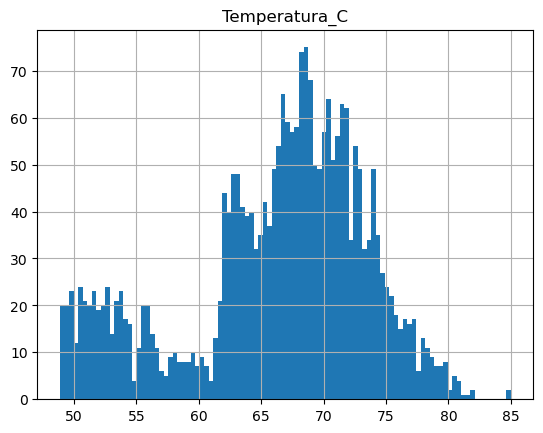

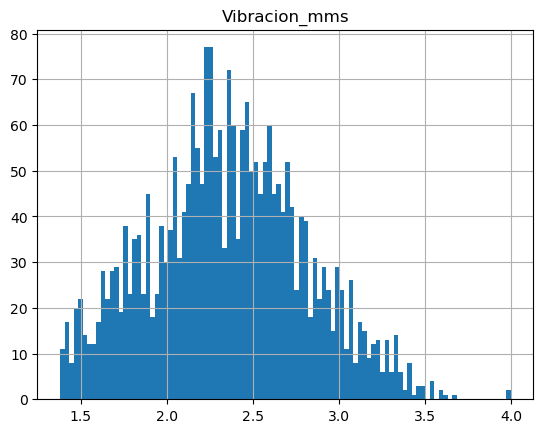

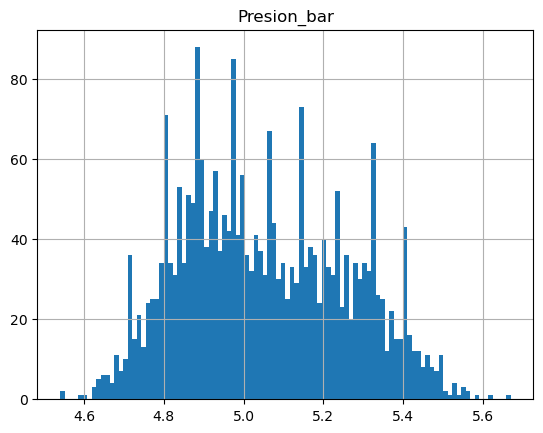

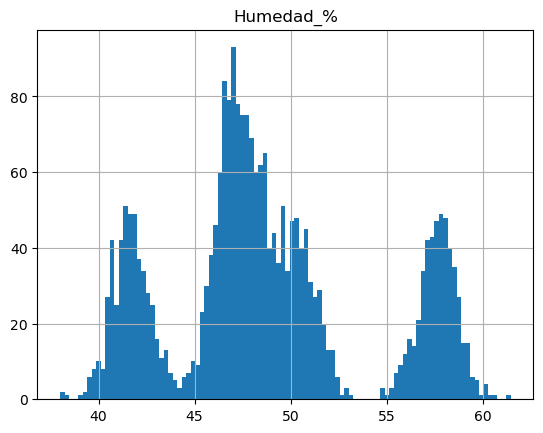

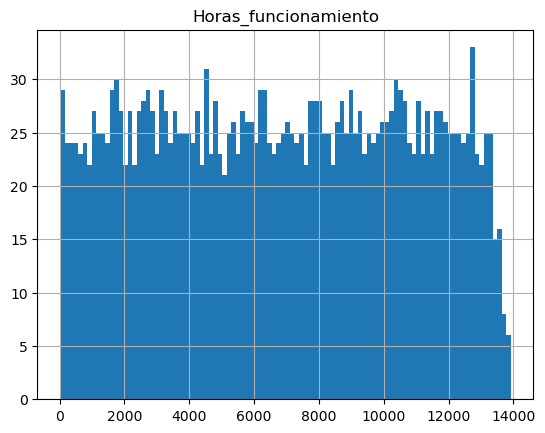

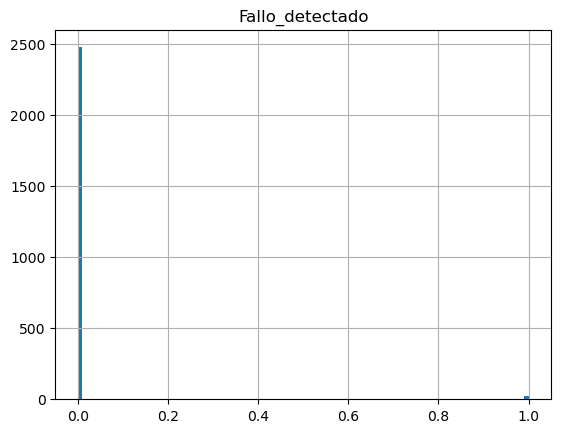

In [9]:
for col in df_numeric.columns:
    df_numeric[col].hist(bins=100)
    plt.title(col)
    plt.show()

Vamos a ver los gráficos de bigotes en las 4 variables Temperatura_C, Vibracion_mms, Presion_bar, Humedad_%, de esta manera podremos entender mejor la distribución de los atípicos y mejorar la toma de decisiones.
Las variables Horas_funcionamiento y Fallo_detectado no presentan atípicos.

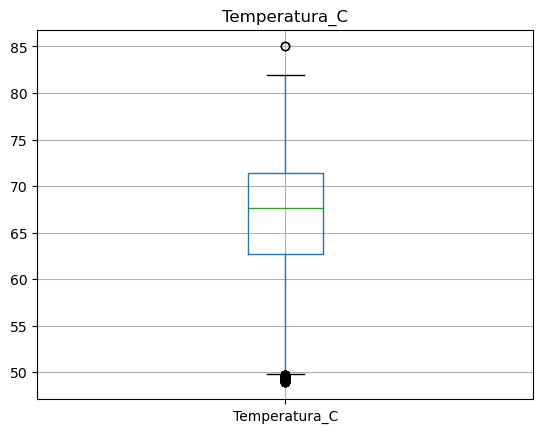

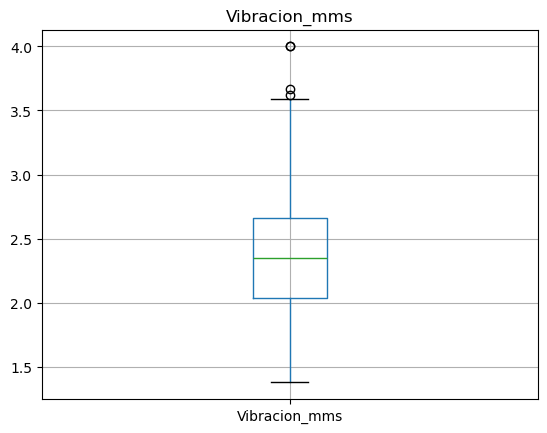

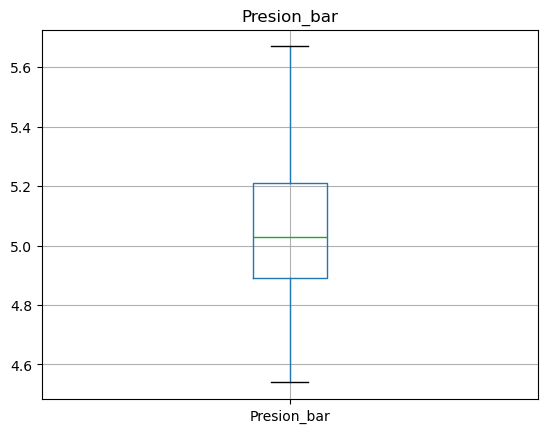

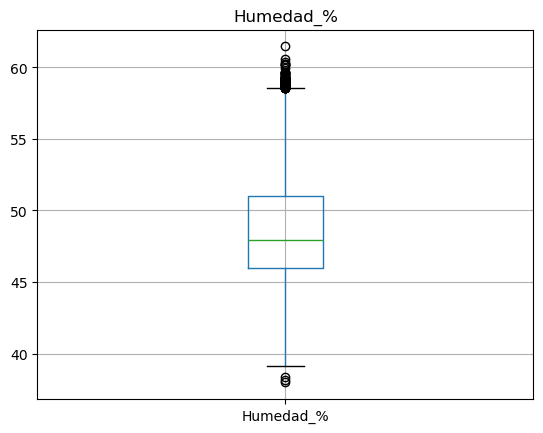

In [10]:
for col in ['Temperatura_C', 'Vibracion_mms', 'Presion_bar', 'Humedad_%']:
    df_numeric.boxplot(column=[col])
    plt.title(col)
    plt.show()


A la vista de los resultados vamos a ver los valores máximos de cada variable para ver en qué grado son atípicos y si están generando fallos.
De esta manera valoraremos si merece la pena actuar sobre los atípicos.
Vamos a mostrar los valores más altos de cada variable y los más altos de cada variable agrupado en ID_Motor, por si cada motor presenta unas condiciones diferentes.

Atípicos de Temperatura_C

In [11]:
# Mostrar los 5 valores más altos de 'Temperatura_C'
top_10_temp = df.nlargest(10, 'Temperatura_C')
print(top_10_temp)

     ID_Motor  Temperatura_C  Vibracion_mms  Presion_bar  Humedad_%  \
999   Motor_2          85.00           4.00         4.92      47.04   
2499  Motor_5          85.00           4.00         5.20      48.56   
495   Motor_1          81.95           3.16         5.34      57.85   
499   Motor_1          81.80           2.89         5.35      58.56   
472   Motor_1          81.57           2.80         5.14      59.23   
474   Motor_1          81.29           2.57         5.22      58.32   
466   Motor_1          81.02           3.33         5.43      57.30   
497   Motor_1          80.91           3.43         5.19      58.30   
460   Motor_1          80.82           3.30         5.39      57.80   
473   Motor_1          80.75           3.26         5.37      58.27   

      Horas_funcionamiento  Fallo_detectado  
999                  13331                1  
2499                 13682                1  
495                  13846                1  
499                  13921        

In [12]:
# Mostrar los 5 valores más altos de 'Temperatura_C' para cada ID_Motor
mayor_5_temperatura_por_motor = df.groupby('ID_Motor').apply(
    lambda x: x.nlargest(5, 'Temperatura_C')[['ID_Motor', 'Temperatura_C', 'Fallo_detectado']]
)
print(mayor_5_temperatura_por_motor)

              ID_Motor  Temperatura_C  Fallo_detectado
ID_Motor                                              
Motor_1  495   Motor_1          81.95                1
         499   Motor_1          81.80                1
         472   Motor_1          81.57                1
         474   Motor_1          81.29                1
         466   Motor_1          81.02                1
Motor_2  999   Motor_2          85.00                1
         990   Motor_2          75.48                0
         962   Motor_2          75.05                0
         978   Motor_2          75.03                0
         987   Motor_2          74.98                0
Motor_3  1499  Motor_3          80.65                1
         1484  Motor_3          80.52                1
         1481  Motor_3          80.21                1
         1474  Motor_3          80.13                1
         1498  Motor_3          79.79                1
Motor_4  1991  Motor_4          63.40                0
         1

C:\Users\carlo\AppData\Local\Temp\ipykernel_4772\2746016422.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mayor_5_temperatura_por_motor = df.groupby('ID_Motor').apply(


Lo outliers de temperatura tienen Fallo_detectado, por lo que podrían ser un registro útil para detectar fallos, por lo que **vamos a conservarlos**.

Atípicos de Vibracion_mms:

In [13]:
# Mostrar los 5 valores más altos de 'Vibracion_mms'
top_10_vib = df.nlargest(10, 'Vibracion_mms')
print(top_10_vib)

     ID_Motor  Temperatura_C  Vibracion_mms  Presion_bar  Humedad_%  \
999   Motor_2          85.00           4.00         4.92      47.04   
2499  Motor_5          85.00           4.00         5.20      48.56   
1498  Motor_3          79.79           3.67         4.77      46.19   
1497  Motor_3          77.10           3.62         5.00      47.63   
1478  Motor_3          72.41           3.59         4.73      47.02   
1997  Motor_4          56.47           3.59         4.95      42.56   
1981  Motor_4          58.02           3.54         5.01      41.85   
1471  Motor_3          78.86           3.53         4.65      48.23   
1499  Motor_3          80.65           3.53         4.81      48.91   
1985  Motor_4          56.20           3.53         5.11      40.90   

      Horas_funcionamiento  Fallo_detectado  
999                  13331                1  
2499                 13682                1  
1498                 13665                1  
1497                 13618        

In [14]:
# Mostrar los 5 valores más altos de 'Vibracion_mms' para cada ID_Motor
mayor_5_vibracion_por_motor = df.groupby('ID_Motor').apply(
    lambda x: x.nlargest(5, 'Vibracion_mms')[['ID_Motor', 'Vibracion_mms', 'Fallo_detectado']]
)
print(mayor_5_vibracion_por_motor)

              ID_Motor  Vibracion_mms  Fallo_detectado
ID_Motor                                              
Motor_1  497   Motor_1           3.43                1
         466   Motor_1           3.33                1
         460   Motor_1           3.30                1
         463   Motor_1           3.30                0
         476   Motor_1           3.29                0
Motor_2  999   Motor_2           4.00                1
         980   Motor_2           3.04                0
         979   Motor_2           2.98                0
         995   Motor_2           2.96                0
         959   Motor_2           2.91                0
Motor_3  1498  Motor_3           3.67                1
         1497  Motor_3           3.62                1
         1478  Motor_3           3.59                1
         1471  Motor_3           3.53                1
         1499  Motor_3           3.53                1
Motor_4  1997  Motor_4           3.59                1
         1

C:\Users\carlo\AppData\Local\Temp\ipykernel_4772\2655256110.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mayor_5_vibracion_por_motor = df.groupby('ID_Motor').apply(


Los valores más elevados de vibraciones han dado Fallo__detectado. Por lo que **se decide mantener los valores** atípicos porque están aportando **información valiosa al modelo** de detección de fallos.

Atípicos de Presion_bar:

In [15]:
top_10_vib = df.nlargest(10, 'Presion_bar')
print(top_10_vib)

    ID_Motor  Temperatura_C  Vibracion_mms  Presion_bar  Humedad_%  \
470  Motor_1          74.49           2.81         5.67      56.15   
223  Motor_1          73.24           2.48         5.62      57.52   
165  Motor_1          71.10           2.14         5.58      57.52   
122  Motor_1          68.92           2.11         5.56      57.01   
214  Motor_1          73.85           2.23         5.56      57.59   
82   Motor_1          69.21           2.20         5.55      58.02   
380  Motor_1          74.85           2.68         5.55      57.11   
420  Motor_1          71.94           3.11         5.55      58.08   
377  Motor_1          72.04           2.63         5.54      57.44   
202  Motor_1          71.42           2.18         5.53      56.88   

     Horas_funcionamiento  Fallo_detectado  
470                 13197                0  
223                  6248                0  
165                  4570                0  
122                  3368                0  
214 

In [16]:
# Mostrar los 5 valores más altos de 'Presion_bar' para cada ID_Motor
mayor_5_presion_por_motor = df.groupby('ID_Motor').apply(
    lambda x: x.nlargest(5, 'Presion_bar')[['ID_Motor', 'Presion_bar', 'Fallo_detectado']]
)
print(mayor_5_presion_por_motor)

              ID_Motor  Presion_bar  Fallo_detectado
ID_Motor                                            
Motor_1  470   Motor_1         5.67                0
         223   Motor_1         5.62                0
         165   Motor_1         5.58                0
         122   Motor_1         5.56                0
         214   Motor_1         5.56                0
Motor_2  890   Motor_2         5.13                0
         707   Motor_2         5.12                0
         935   Motor_2         5.12                0
         520   Motor_2         5.09                0
         709   Motor_2         5.09                0
Motor_3  1132  Motor_3         5.12                0
         1192  Motor_3         5.11                0
         1441  Motor_3         5.11                0
         1054  Motor_3         5.09                0
         1099  Motor_3         5.09                0
Motor_4  1859  Motor_4         5.33                0
         1598  Motor_4         5.28           

C:\Users\carlo\AppData\Local\Temp\ipykernel_4772\629406213.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mayor_5_presion_por_motor = df.groupby('ID_Motor').apply(


Los valores más altos no parecen atípicos, y no generan fallos, vamos a ver los inferiores:

In [17]:
# Mostrar los 5 valores más bajos de 'Presion_bar' para cada ID_Motor
menor_5_presion_por_motor = df.groupby('ID_Motor').apply(
    lambda x: x.nsmallest(5, 'Presion_bar')[['ID_Motor', 'Presion_bar', 'Fallo_detectado']]
)
print(menor_5_presion_por_motor)

              ID_Motor  Presion_bar  Fallo_detectado
ID_Motor                                            
Motor_1  94    Motor_1         4.98                0
         192   Motor_1         4.98                0
         177   Motor_1         5.06                0
         436   Motor_1         5.08                0
         491   Motor_1         5.08                0
Motor_2  591   Motor_2         4.54                0
         895   Motor_2         4.59                0
         595   Motor_2         4.62                0
         859   Motor_2         4.62                0
         531   Motor_2         4.64                0
Motor_3  1003  Motor_3         4.54                0
         1019  Motor_3         4.60                0
         1411  Motor_3         4.63                0
         1002  Motor_3         4.64                0
         1210  Motor_3         4.64                0
Motor_4  1521  Motor_4         4.76                0
         1599  Motor_4         4.78           

C:\Users\carlo\AppData\Local\Temp\ipykernel_4772\1599104899.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  menor_5_presion_por_motor = df.groupby('ID_Motor').apply(


Los valores mínimos son valores admisibles, por lo que vamos a conservarlos.

Atípicos de Humedad_%, calculando los atípicos por cada Motor de manera independiente:

In [18]:
# Mostrar los 5 valores más elevados de 'Humedad_%' para cada ID_Motor
mayor_5_humedad_por_motor = df.groupby('ID_Motor').apply(
    lambda x: x.nlargest(5, 'Humedad_%')[['ID_Motor', 'Humedad_%', 'Fallo_detectado']]
)
print(mayor_5_humedad_por_motor)

              ID_Motor  Humedad_%  Fallo_detectado
ID_Motor                                          
Motor_1  46    Motor_1      61.47                0
         21    Motor_1      60.56                0
         175   Motor_1      60.36                0
         135   Motor_1      60.26                0
         172   Motor_1      60.22                0
Motor_2  837   Motor_2      49.43                0
         815   Motor_2      49.34                0
         970   Motor_2      49.20                0
         905   Motor_2      49.11                0
         848   Motor_2      49.08                0
Motor_3  1467  Motor_3      50.97                0
         1146  Motor_3      50.32                0
         1232  Motor_3      50.15                0
         1019  Motor_3      50.11                0
         1367  Motor_3      50.00                0
Motor_4  1513  Motor_4      44.71                0
         1593  Motor_4      44.69                0
         1626  Motor_4      44.

C:\Users\carlo\AppData\Local\Temp\ipykernel_4772\4101722690.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mayor_5_humedad_por_motor = df.groupby('ID_Motor').apply(


In [19]:
# Mostrar los 5 valores más bajos de 'Humedad_%' para cada ID_Motor
menor_5_humedad_por_motor = df.groupby('ID_Motor').apply(
    lambda x: x.nsmallest(5, 'Humedad_%')[['ID_Motor', 'Humedad_%', 'Fallo_detectado']]
)
print(menor_5_humedad_por_motor)

              ID_Motor  Humedad_%  Fallo_detectado
ID_Motor                                          
Motor_1  341   Motor_1      54.69                0
         231   Motor_1      54.77                0
         141   Motor_1      54.83                0
         174   Motor_1      54.90                0
         109   Motor_1      55.16                0
Motor_2  993   Motor_2      43.76                0
         954   Motor_2      43.99                0
         884   Motor_2      44.07                0
         974   Motor_2      44.10                0
         714   Motor_2      44.40                0
Motor_3  1171  Motor_3      44.44                0
         1044  Motor_3      44.73                0
         1434  Motor_3      45.23                0
         1172  Motor_3      45.24                0
         1132  Motor_3      45.31                0
Motor_4  1604  Motor_4      37.99                0
         1688  Motor_4      38.17                0
         1569  Motor_4      38.

C:\Users\carlo\AppData\Local\Temp\ipykernel_4772\3894746207.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  menor_5_humedad_por_motor = df.groupby('ID_Motor').apply(


Vemos que los valores más elevados y más bajos de humedades están dentro de **valores admisibles** por lo que **decidimos conservarlos**.

Todo este **exhaustivo estudio** de los valores atípicos o outliers nos ha servido para comprender cómo se comporta nuestra muestra (o muestras, ya que en realidad tenemos una muestra de cada motor). 
Hemos aprendido que:
- Los outliers tienen un valor informativo, ya que generan errores, y están dentro de valores admisibles. Al haber tan pocos fallos de motor, no vamos a eliminar ningún outlier.
- Las submuestras de cada motor tienen valores diferentes entre ellos debido a distintas condiciones de trabajo, por lo que debemos normalizar las muestras.

Matriz de correlaciones

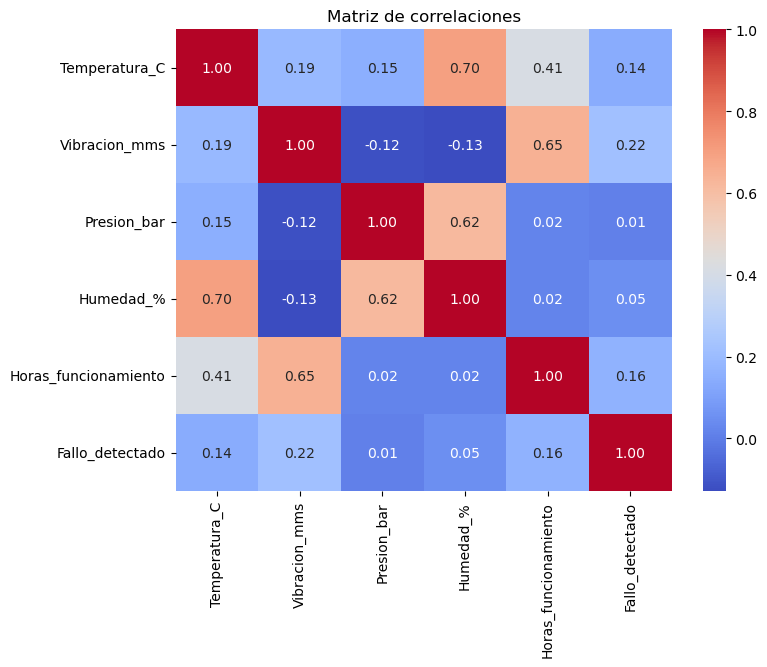

In [20]:
# Matriz de correlaciones para las variables numéricas
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona solo las variables numéricas originales
variables = ['Temperatura_C', 'Vibracion_mms', 'Presion_bar', 'Humedad_%', 'Horas_funcionamiento','Fallo_detectado']
corr = df[variables].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlaciones')
plt.show()

A la vista de los resultados, vemos que hay una fuerte correlación entre algunas variables, por ejemplo humedad está correlacionada con las variables temperatura y presión. Y entre horas de funcionamiento y vibración (y menos con temperatura).
Sin embargo, no hay ninguna correlación fuerte con el fallo. La correlación de fallo con vibración es de 0,22, y menor con el resto. 
Será un reto obtener un modelo que prediga exitosamente el fallo de motor.

# Modelado Predictivo

En primer lugar vamos a hacer una **estandarización**. Previamente había hecho una normalización de las variables pero luego me he dado cuenta de que si luego usaba el modelo de scikit learn para las predicciones, no tenía sentido normalizar 2 veces. Finalmente decidí normalizar con el paquete StandardScaler.

In [21]:
from sklearn.preprocessing import StandardScaler
import pickle

# Lista de columnas para escalar
columns = ['Temperatura_C', 'Vibracion_mms', 'Presion_bar', 'Humedad_%', 'Horas_funcionamiento']

# Escalar las columnas numéricas
scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns])

# Guardar el objeto scaler para uso posterior
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Mostrar las primeras filas del dataset procesado
df.head()

,ID_Motor,Temperatura_C,Vibracion_mms,Presion_bar,Humedad_%,Horas_funcionamiento,Fallo_detectado
0,Motor_1,0.172065,-0.864812,1.446024,1.838511,-1.727935,0
1,Motor_1,0.173414,-0.864812,1.106909,1.750463,-1.720798,0
2,Motor_1,0.177459,-0.864812,0.477125,1.542519,-1.714425,0
3,Motor_1,0.184202,-0.864812,1.446024,1.505052,-1.702700,0
4,Motor_1,0.184202,-0.864812,0.767794,1.718615,-1.690464,0


# Regresión Logística

Regresión Logística. A pesar del nombre, es un clasificador. 
- Aplicaremos penalización L1, ya tiene mejor resultado que L2 (0.9907 vs 0.9880)
- Establecemos conjunto de entrenamiento y prueba (70%-30%)

In [22]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Construcción del dataset para el primer modelo
df_model1 = df.drop(['ID_Motor'], axis=1)

# Mostrar las primeras filas
df_model1.head()

# Conteo de clases en la variable objetivo
print(df_model1['Fallo_detectado'].value_counts())

# Codificar variable objetivo
le = LabelEncoder()
df_model1['Fallo_detectado'] = le.fit_transform(df_model1['Fallo_detectado'])

# Separar variables independientes y dependiente
X = df_model1.drop('Fallo_detectado', axis=1)
y = df_model1['Fallo_detectado']

# División entrenamiento-prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir modelo: Regresión logística binaria
lr = LogisticRegression(penalty="l1", max_iter=1000, solver='liblinear')

# Validación cruzada estratificada repetida
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluar con validación cruzada
n_scores = cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(f'Accuracy CV media: {n_scores.mean():.4f}')

# Entrenar modelo con todos los datos de entrenamiento
lr.fit(X_train, y_train)

# Evaluar modelo con conjunto de prueba
score_test = lr.score(X_test, y_test)
print(f'Accuracy en test: {score_test:.4f}')

from sklearn.metrics import recall_score

# Predecir con el modelo entrenado
y_pred = lr.predict(X_test)

# Calcular recall en el conjunto de prueba
recall = recall_score(y_test, y_pred)
print(f'Recall en test: {recall:.4f}')

from sklearn.metrics import f1_score

# Calcular F1 score en el conjunto de prueba
f1 = f1_score(y_test, y_pred)
print(f'F1 score en test: {f1:.4f}')

# Guardar modelo entrenado
with open('model_lr.pkl', 'wb') as f:
    pickle.dump(lr, f)

Fallo_detectado
0    2475
1      25
Name: count, dtype: int64
Accuracy CV media: 0.9922
Accuracy en test: 0.9920
Recall en test: 0.3333
F1 score en test: 0.5000


Accuracy nos dice en qué proporción ha acertado. En nuestro caso, el valor es elevado, pero hay que mirar con más detalle, ya que al haber una gran mayoría de 0 (no error), para nuestro caso es fundamental que acierte al detectar errores. Por eso usamos otros indicadores de acierto en predicción de errores.

Recall score: valor de precisión sobre los fallos detectados. Esta precisión es importante, ya que hay muy pocos fallos sobre el total, por lo que adivinarlos es fundamental.

F1 score: combina la precisión y el recall.
Se calcula F1 = 2 * (precisión * recall) / (precisión + recall), 
donde: 

    Precisión: de los casos predichos como positivos, cuántos son realmente positivos.

    Recall: de los positivos reales, cuántos detectó el modelo.

In [23]:
# Crear DataFrame con resultados del modelo para almacenar en la base de datos
df_modelos = pd.DataFrame(
    {'Modelo':['Regresion_logistica'],
    'Accuracy_CV': [n_scores.mean()],
    'Accuracy': [score_test],
    'Recall': [recall],
    'F1': [f1]
    }
)
print(df_modelos)

                Modelo  Accuracy_CV  Accuracy    Recall   F1
0  Regresion_logistica      0.99219     0.992  0.333333  0.5


# Decision tree

In [24]:
from sklearn import tree

# Definir modelo Decision Tree
dt = tree.DecisionTreeClassifier()

# Mantener el mismo esquema de validación cruzada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluar con validación cruzada
n_scores = cross_val_score(dt, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(f'Accuracy CV media (Decision Tree): {n_scores.mean():.4f}')

# Entrenar modelo
dt.fit(X_train, y_train)

# Evaluar en conjunto de prueba
score_test = dt.score(X_test, y_test)
print(f'Accuracy en test (Decision Treet): {score_test:.4f}')

# Predecir con el modelo entrenado
y_pred = dt.predict(X_test)

# Calcular recall en el conjunto de prueba
recall = recall_score(y_test, y_pred)
print(f'Recall en test (Decision Tree): {recall:.4f}')

# Calcular F1 score en el conjunto de prueba
f1 = f1_score(y_test, y_pred)
print(f'F1 score en test (Decision Tree): {f1:.4f}')

# Guardar modelo entrenado
with open('model_dt.pkl', 'wb') as f:
    pickle.dump(dt, f)

Accuracy CV media (Decision Tree): 0.9990
Accuracy en test (Decision Treet): 0.9987
Recall en test (Decision Tree): 1.0000
F1 score en test (Decision Tree): 0.9474


El árbol de decisión mejora significativamente el anterior modelo, vamos a ver si con Random forest conseguimos mejorar la precisión. En teoría, debería ser así.

In [25]:
# Actualizomos el DataFrame con los resultados del modelo Decision Tree
nuevo_modelo = pd.DataFrame(
    {'Modelo':['Decision_tree'],
    'Accuracy_CV': [n_scores.mean()],
    'Accuracy': [score_test],
    'Recall': [recall],
    'F1': [f1]
    }
)
df_modelos = pd.concat([df_modelos, nuevo_modelo], ignore_index=True)
print(df_modelos)

                Modelo  Accuracy_CV  Accuracy    Recall        F1
0  Regresion_logistica     0.992190  0.992000  0.333333  0.500000
1        Decision_tree     0.999048  0.998667  1.000000  0.947368


# Random forest

Este modelo es un conjunto de árboles de decisión. La decisión final es el voto de la mayoría de árboles. Es más robuesto y potente. 
Este modelo tiene 100 árboles.

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Definir modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Mantener el mismo esquema de validación cruzada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluar con validación cruzada
n_scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(f'Accuracy CV media (Random Forest): {n_scores.mean():.4f}')

# Entrenar modelo
rf.fit(X_train, y_train)

# Evaluar en conjunto de prueba
score_test = rf.score(X_test, y_test)
print(f'Accuracy en test (Random Forest): {score_test:.4f}')

# Predecir con el modelo entrenado
y_pred = rf.predict(X_test)

# Calcular recall en el conjunto de prueba
recall = recall_score(y_test, y_pred)
print(f'Recall en Random Forest: {recall:.4f}')

# Calcular F1 score en el conjunto de prueba
f1 = f1_score(y_test, y_pred)
print(f'F1 score en Random Forest: {f1:.4f}')

# Guardar modelo entrenado
with open('model_rf.pkl', 'wb') as f:
    pickle.dump(rf, f)

Accuracy CV media (Random Forest): 0.9996
Accuracy en test (Random Forest): 0.9987
Recall en Random Forest: 0.8889
F1 score en Random Forest: 0.9412


Sorprendentemente, este modelo no mejora al anterior: recall en decision tree es de 1,00 y random forest de 0,889. F1 es 0,947 en decision tree y 0,941 en random forest.

In [27]:
# Actualizomos el DataFrame con los resultados del modelo Random Forest
nuevo_modelo = pd.DataFrame(
    {'Modelo':['Random_forest'],
    'Accuracy_CV': [n_scores.mean()],
    'Accuracy': [score_test],
    'Recall': [recall],
    'F1': [f1]
    }
)
df_modelos = pd.concat([df_modelos, nuevo_modelo], ignore_index=True)
print(df_modelos)

                Modelo  Accuracy_CV  Accuracy    Recall        F1
0  Regresion_logistica     0.992190  0.992000  0.333333  0.500000
1        Decision_tree     0.999048  0.998667  1.000000  0.947368
2        Random_forest     0.999619  0.998667  0.888889  0.941176


# SVM Support Vector Machines

Vamos a utilizar el método Support Vector Classification. con el kernel por defecto 'rbf'.

In [28]:
from sklearn import svm

# Definir modelo Decision Tree
sv = svm.SVC(kernel='rbf',class_weight='balanced', C=1.0, random_state=42)

# Mantener el mismo esquema de validación cruzada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluar con validación cruzada
n_scores = cross_val_score(sv, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(f'Accuracy CV media (SVC): {n_scores.mean():.4f}')

# Entrenar modelo
sv.fit(X_train, y_train)

# Evaluar en conjunto de prueba
score_test = sv.score(X_test, y_test)
print(f'Accuracy en test (SVC): {score_test:.4f}')

# Predecir con el modelo entrenado
y_pred = sv.predict(X_test)

# Calcular recall en el conjunto de prueba
recall = recall_score(y_test, y_pred)
print(f'Recall en test (SVC): {recall:.4f}')

# Calcular F1 score en el conjunto de prueba
f1 = f1_score(y_test, y_pred)
print(f'F1 score en test (SVC): {f1:.4f}')

# Guardar modelo entrenado
with open('model_sv.pkl', 'wb') as f:
    pickle.dump(sv, f)

Accuracy CV media (SVC): 0.9834
Accuracy en test (SVC): 0.9760
Recall en test (SVC): 1.0000
F1 score en test (SVC): 0.5000


Este método es menos preciso que Random Forest. Este último será el que elegiremos para nuestro modelo de predicción de fallos.

In [29]:
# Actualizomos el DataFrame con los resultados del modelo SVM
nuevo_modelo = pd.DataFrame(
    {'Modelo':['SVM'],
    'Accuracy_CV': [n_scores.mean()],
    'Accuracy': [score_test],
    'Recall': [recall],
    'F1': [f1]
    }
)
df_modelos = pd.concat([df_modelos, nuevo_modelo], ignore_index=True)
print(df_modelos)

                Modelo  Accuracy_CV  Accuracy    Recall        F1
0  Regresion_logistica     0.992190  0.992000  0.333333  0.500000
1        Decision_tree     0.999048  0.998667  1.000000  0.947368
2        Random_forest     0.999619  0.998667  0.888889  0.941176
3                  SVM     0.983429  0.976000  1.000000  0.500000


# Prueba del modelo con nuevos datos

In [40]:
# Cargar el escalador desde el archivo pickle
import joblib
import numpy as np

# Cargar el scaler guardado
scaler = joblib.load("scaler.pkl")

# Cargar los modelos entrenados
model_dt = joblib.load("model_dt.pkl")

Vamos a simular un caso real de introducción de datos nuevos.

In [31]:
# Supondremos una matriz de datos de lecturas nuevas
df_raw = pd.DataFrame({'Motor_ID': ['Motor_1', 'Motor_2', 'Motor_3','Motor_4','Motor_5'],
    'Temperatura_C': [60, 61, 63, 70, 80],
    'Vibracion_mms': [2, 1.5, 1.7, 1.4, 3],
    'Presion_bar': [4.5, 4.6, 4.8, 5, 5.3],
    'Humedad_%': [45, 50, 55, 60, 58],
    'Horas_funcionamiento': [1000, 1500, 1200, 1600, 12500]
})

df_raw.head()

,Motor_ID,Temperatura_C,Vibracion_mms,Presion_bar,Humedad_%,Horas_funcionamiento
0,Motor_1,60,2.0,4.5,45,1000
1,Motor_2,61,1.5,4.6,50,1500
2,Motor_3,63,1.7,4.8,55,1200
3,Motor_4,70,1.4,5.0,60,1600
4,Motor_5,80,3.0,5.3,58,12500


In [32]:
# Escalar sólo las columnas 'Temperatura_C', 'Vibracion_mms', 'Presion_bar', 'Humedad_%', 'Horas_funcionamiento'
df_scaled = df_raw[['Temperatura_C', 'Vibracion_mms', 'Presion_bar', 'Humedad_%', 'Horas_funcionamiento']]
scaled_input = scaler.transform(df_scaled)
scaled_input

array([[-0.83661238, -0.77670419, -2.67179733, -0.71488484, -1.48399547],
       [-0.70176243, -1.87804983, -2.18734779,  0.22179735, -1.35654549],
       [-0.43206251, -1.43751157, -1.21844872,  1.15847954, -1.43301548],
       [ 0.51188721, -2.09831896, -0.24954965,  2.09516173, -1.3310555 ],
       [ 1.8603868 ,  1.42598709,  1.20379897,  1.72048886,  1.4473539 ]])

In [41]:
# Realizamos predicciones con el modelo Random Forest, añadiendo los nombres de columnas
columnas = ['Temperatura_C', 'Vibracion_mms', 'Presion_bar', 'Humedad_%', 'Horas_funcionamiento']
scaled_input_df = pd.DataFrame(scaled_input, columns=columnas)
fallo_previsto = model_dt.predict(scaled_input_df)

In [42]:
# df final con datos de lecturas y las predicciones

df_prediccion = df_raw.copy()
df_prediccion['Fallo_previsto'] = fallo_previsto

print(df_prediccion)

  Motor_ID  Temperatura_C  Vibracion_mms  Presion_bar  Humedad_%  \
0  Motor_1             60            2.0          4.5         45   
1  Motor_2             61            1.5          4.6         50   
2  Motor_3             63            1.7          4.8         55   
3  Motor_4             70            1.4          5.0         60   
4  Motor_5             80            3.0          5.3         58   

   Horas_funcionamiento  Fallo_previsto  
0                  1000               0  
1                  1500               0  
2                  1200               0  
3                  1600               0  
4                 12500               1  


Creamos un bucle que pase por las lecturas de los motores y nos interprete la predicción.

In [44]:
# Iconos para la interpretación visual
atencion = "❌"
ok = "✅"
# Interpretación de predicción
for motor in df_prediccion['Motor_ID']:
    fallo = df_prediccion[df_prediccion['Motor_ID'] == motor]['Fallo_previsto'].values[0]
    if fallo == 1:
        print(f"{atencion} {motor} - Posible fallo")
    else:
        print(f"{ok} {motor} - En buen estado")

✅ Motor_1 - En buen estado
✅ Motor_2 - En buen estado
✅ Motor_3 - En buen estado
✅ Motor_4 - En buen estado
❌ Motor_5 - Posible fallo


Exportar datos a tabla de SQL

In [45]:
from sqlalchemy import create_engine

# Conexión a la base de datos con autenticación de Windows
engine = create_engine("mssql+pyodbc://CARLOSLLISA\\SQLEXPRESS/Prediccion_fallos?driver=ODBC+Driver+17+for+SQL+Server&Trusted_Connection=yes")
df_prediccion.to_sql('Prediccion', engine, if_exists='replace', index=False)

5

In [37]:
# cargamos el DataFrame original para almacenar en la base de datos
df_original.to_sql('Original', engine, if_exists='replace', index=False)

108

In [46]:
# cargamos el DataFrame con la comparalación de modelos para almacenar en la base de datos
df_modelos.to_sql('Modelos', engine, if_exists='replace', index=False)

4

# Conclusiones finales

En este trabajo hemos realizado un análisis exploratorio en profundidad en el que hemos podido comprobar que los valores atípicos deben ser incluidos en el dataset de análisis por ser valores correctos e importantes para la generación de información valiosa. Estos valores, siendo válidos, en algunos casos están ocasionando fallos en los motores. Dado que en conjunto se han producido un número reducido de fallos de motor se ha decidido conservar todos los valores del conjunto de datos. 

En el análisis de correlaciones hemos visto que no hay relaciones fuertes entre fallo motor y las distintas variables, aunque sí la hay entre algunas variables entre sí. 

Hemos continuado con el modelado predictivo, haciendo pruebas con 4 modelos supervisados distintos: Regresión Logística, Decisión Tree, Random Forest y Support Vector Classification (SVM). Hemos estimado la confiabilidad de los modelos mediante las pruebas de validación cruzada, accuracy, recall y F1 score. 

Hemos creado un df con los resultados de la precisión de cada modelo, y el **modelo Decision Tree es que sale mejor puntuado** entre ellos. Una prueba muy inportante es la **prueba recall**, que indica de todos los casos que realmente eran fallos, cuántos logró detectar correctamente el modelo. Es especialmente importante dado que se producen muy pocos fallos, y actuar sobre un motor que no presenta fallos es costoso.

In [48]:
# Vista de los resultados de los modelos
print(df_modelos)

                Modelo  Accuracy_CV  Accuracy    Recall        F1
0  Regresion_logistica     0.992190  0.992000  0.333333  0.500000
1        Decision_tree     0.999048  0.998667  1.000000  0.947368
2        Random_forest     0.999619  0.998667  0.888889  0.941176
3                  SVM     0.983429  0.976000  1.000000  0.500000


Finalmente, hemos creado un código para hacer predicciones con nuestro modelo Decision Tree, con iconos que mejoran la comprensión.
Hemos terminado hemos hecho pruebas con valores ficticios que servirán para predecir si habrán fallos. 

Mediante el establecimiento de un ciclo de vida del modelo, se iría entrenando y testeando para su mejora y actualización. El modelo puede quedarse obsoleto, dadas nuevas condiciones de los motores por ejemplo. Por otra parte, con un mayor número de datos el modelo puede mejorar su capacidad de predicción.

Asimismo, pueden realizarse **simulaciones**, para anticipar posibles problemas antes de que las condiciones de presenten.
Por ejemplo, pueden simularse escenarios en los que un motor alcance ciertas condiciones de temperaturas o humedad, para actuar antes de que el fallo se presente.
Esta simulación de escenarios también puede automatizarse y crearse alarmas ante posibles fallos, dependiendo de la criticidad del equipamiento.